In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
df=pd.read_csv("C:/Users/RIYA GUPTA/Downloads/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:xlabel='price'>

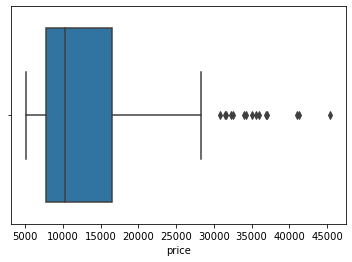

In [9]:
# data visualisation
sns.boxplot(df['price'])

In [10]:
df['CarName'].value_counts()

peugeot 504                        6
toyota corona                      6
toyota corolla                     6
subaru dl                          4
mazda 626                          3
                                  ..
volkswagen 1131 deluxe sedan       1
honda civic 1300                   1
buick regal sport coupe (turbo)    1
subaru r2                          1
volkswagen rabbit custom           1
Name: CarName, Length: 147, dtype: int64

In [11]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [12]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [13]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [14]:
df['doornumber']=df['doornumber'].map({'four':4,'two':2})

In [15]:
df['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [16]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [17]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [18]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [19]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [20]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [21]:
df['cylindernumber']=df['cylindernumber'].map({'four':4,'two':2,'six':6,'five':5,'eight':8,'three':3,'twelve':12})

In [22]:
df['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [23]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [24]:
df.drop(['CarName'],axis=1,inplace=True)

In [25]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
dummy=pd.get_dummies(df,drop_first=True)
dummy

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,1,0,0,0,0


In [27]:
dummy.shape

(205, 40)

In [28]:
dummy.drop(['car_ID','symboling'],axis=1,inplace=True)

In [29]:
dummy.shape

(205, 38)

(array([  4.,   1., 159.,  11.,  24.,   0.,   5.,   0.,   0.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 10 artists>)

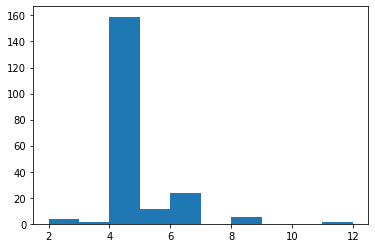

In [30]:
plt.hist(dummy['cylindernumber'])

(array([ 90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 115.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

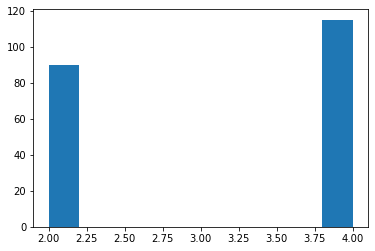

In [31]:
plt.hist(dummy['doornumber'])

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

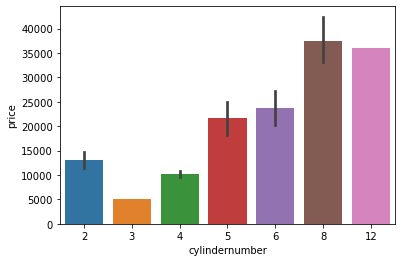

In [32]:
sns.barplot(x='cylindernumber',y='price',data=dummy)

In [33]:
x=dummy.drop('price',axis=1)
y=dummy['price']

In [34]:
x.shape

(205, 37)

In [35]:
y.shape

(205,)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=51)

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(143, 37) (62, 37) (143,) (62,)


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg=LinearRegression()
reg

LinearRegression()

In [40]:
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
reg.coef_

array([-2.20006355e+02,  8.27277206e-01,  1.79975003e+01,  4.94714485e+02,
        3.77592270e+02,  2.35617386e+00, -2.46855337e+03,  2.47249294e+02,
       -1.04218170e+04, -7.11739112e+03, -1.38597813e+03,  7.70561598e+00,
        3.51800862e+00, -2.65214854e+01,  2.08804814e+02, -1.04724963e+04,
        2.29787463e+03, -3.79481798e+03, -3.04825700e+03, -2.77190894e+03,
       -4.56843153e+03, -5.32759938e+02,  8.64455221e+02,  6.64252083e+03,
        9.38422913e+03, -7.15759467e+02,  2.99071454e+03,  3.41860089e+03,
       -3.08599573e+03,  5.62434571e+03,  1.38082938e+03,  5.62434571e+03,
        1.04724963e+04, -2.65960899e+03,  1.55117090e+03, -2.34394233e+03,
        1.77767389e+03])

In [42]:
reg.intercept_

-13679.091862909285

In [43]:
pred=reg.predict(x_test)     
pred

array([30524.3974072 , 16532.33928414, 11943.75440822, 18249.84021065,
       15082.28885837, 14367.4154261 , 17532.83034301, 12529.64173464,
       32828.75518737,  7119.03313514,  6685.59167042,  7577.04097932,
       11213.44555469,  5726.03952957,  9240.89743453, 17107.18839241,
        9979.36420851,  8172.80037974, 21649.64826723,  7382.8959507 ,
       15996.2068097 , 10714.09098861, 27991.27199126, 15357.86468637,
       17560.50085642, 13740.11642316,  8103.50813948,  7357.80819127,
        8828.98497325, 14211.90111485, 19053.04425385,  6902.02769738,
        8757.44846719,  6948.16538449, 18207.74826354, 10843.92654453,
        9919.84267146, 19042.78667585, 11924.55427794, 18973.62394492,
       17119.78861708, 18286.00268242,  8154.98871842, 11111.64446615,
       17180.64495341, 30824.87295439,  7007.88536884, 21637.21638813,
        7479.93173473, 13093.72607878,  8074.14197116,  7506.80242466,
       27579.15325229, 11382.78402429,  8914.67182441, 11047.99131948,
      

In [44]:
y_test

72     35056.0
101    13499.0
107    11900.0
7      18920.0
124    12764.0
        ...   
19      6295.0
32      5399.0
27      8558.0
51      6095.0
78      6669.0
Name: price, Length: 62, dtype: float64

In [45]:
reg.score(x_test,y_test)   #score tells how much our model is accurate

0.8117609132124756

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print("Mean square error",mse)
print("Root mean square error",rmse)

Mean square error 8882953.578486135
Root mean square error 2980.428421969925


In [47]:
print(r2_score(y_test,pred))

0.8117609132124756
